In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [19]:
def read_results(env: str, alg: str) -> pd.DataFrame:
  root_dir = Path.cwd().parent
  results_dir = root_dir / "results" / env / alg 

  history_path = results_dir / "history.csv"
  analysis_results_path = results_dir / "analysis_results.json"

  history_df = pd.read_csv(history_path)
  with open(analysis_results_path, "r", encoding="utf-8") as f:
    analysis_results = json.load(f)
  return history_df, analysis_results

In [27]:
def render_reward_history(history_df: pd.DataFrame, env: str, alg: str) -> None:
  plt.figure(figsize=(8, 4))
  plt.plot(history_df['reward'], alpha=0.5, label='Нагорода')
  plt.plot(history_df['reward_ma'], color='red', linewidth=2, label='Рухоме середнє')
  plt.xlabel('Ітерації')
  plt.ylabel('Нагорода')
  plt.legend()
  alg_title = alg.replace('_', ' ').upper()
  env_title = env.upper()
  title = f'{env_title} {alg_title}'
  plt.title(title)
  plt.grid(True)
  plt.show()

In [24]:
def analyse_alg(env: str, alg: str) -> None:
  history_df, analysis_results = read_results(env, alg)
  history_df['reward_ma'] = history_df['reward'].rolling(window=50).mean()
  render_reward_history(history_df, env, alg)
  return analysis_results

In [31]:
def analyse() -> None:
  algs = ['mab', 'mab_decay', 'mab_exponential', 'ucb', 'gradient']
  algs = ['ucb']
  rows = []
  for alg in algs:
    res = analyse_alg('simulation', alg)
    rows.append(res)

  results_df = pd.DataFrame(rows)
  return results_df.head()

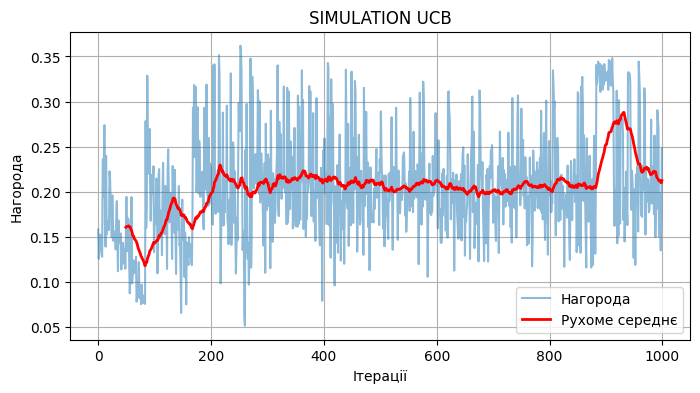

,algorithm,environment,time_diff,high_rewards,convergence_iteration,rewards_sum,highest_reward
0,ucb,simulation,4,96,None,204.2694,0.3619


In [32]:
analyse()